# Data Handling with Pandas


While the [**numpy**](http://www.numpy.org/) library provides strong numerical operations for multidimensional arrays, [**pandas**](https://pandas.pydata.org/) focuses on data analysis. It is a collection of powerful tools for importing, rearranging, analyzing, and exporting tabular data sets.

[pandas documentation](http://pandas.pydata.org/pandas-docs/stable/): *"pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis/manipulation tool available in any language. It is already well on its way toward this goal.“*

Pandas uses the core functionality of numpy to handle its prominent data structure called the [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) (an concept which originated in [**R**](https://www.r-project.org)). Pandas provides a wide range of functions for data analysis like importing and exporting, viewing, selection, indexing, handling missing, statistical analyses, merging, grouping, reshaping, handling time series of data and much more. It also enables plotting via the [**matplotlib**](https://matplotlib.org/) library. 

## Import of Pandas

It is common to use the abbreviation `pd` for pandas. 

In [1]:
import numpy as np
import pandas as pd

## pandas.DataFrame
The [**pandas.DataFrame**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is the central data structure of pandas. Data coming from for example Excel or other SQL(-like) structures can be easily converted to a pandas DataFrame. First, data is created manually to discuss the basic features.

In [2]:
# Construct DataFrame from lists or arrays
names = ['Jon','Tim','Tom','Jan','Sven']
ages = np.random.randint(20,30,5)
children = np.random.randint(0,3,5)

# Combine all lists
data = np.array([names,ages,children]).transpose()
part_data = np.array([ages,children]).transpose()

df = pd.DataFrame(data=data)

In [3]:
df

,0,1,2
0,Jon,27,2
1,Tim,24,2
2,Tom,24,0
3,Jan,27,0
4,Sven,26,2


The DataFrame has a table-like structure, and is in many ways similar to a relational database table. In the example above, columns and rows are created with a default integer index and the given column names, respectively. The labels of the columns and rows (`index`) can be included during constructing or set afterwards.

In [4]:
df.columns = ['names','ages','children']
df

,names,ages,children
0,Jon,27,2
1,Tim,24,2
2,Tom,24,0
3,Jan,27,0
4,Sven,26,2


In [5]:
# Set index from column name
df.set_index('names')

,ages,children
names,,
Jon,27,2
Tim,24,2
Tom,24,0
Jan,27,0
Sven,26,2


In [6]:
# Construct DataFrame with column name and index
df = pd.DataFrame(data=part_data, index=names, columns=['ages','children'])
df

,ages,children
Jon,27,2
Tim,24,2
Tom,24,0
Jan,27,0
Sven,26,2


In [7]:
# Construct DataFram from dictionary
data = {
    'ages': ages,
    'children': children,
    'cousins': np.random.randint(0,3,5)
}

df = pd.DataFrame(data=data, index=names)
df

,ages,children,cousins
Jon,27,2,0
Tim,24,2,1
Tom,24,0,0
Jan,27,0,0
Sven,26,2,0


### Selection of rows and columns

There are several ways to select single rows or single columns by the index or its column name, respectively. Selection rows via use of `[]` or `loc[]` are the easiest ways.

In [8]:
 # Selection of a single row
df[1:2]

,ages,children,cousins
Tim,24,2,1


In [9]:
df.loc['Tim']

ages        24
children     2
cousins      1
Name: Tim, dtype: int64

In [10]:
# Use additional [] to return a new DataFrame
df.loc[['Tim']]

,ages,children,cousins
Tim,24,2,1


In [11]:
# Selection of a range of rows
df[1:3]

,ages,children,cousins
Tim,24,2,1
Tom,24,0,0


In [12]:
df['Tim':'Tom']

,ages,children,cousins
Tim,24,2,1
Tom,24,0,0


For selection of columns there are two ways. When having a 'space' in a column name, only the second one is usable.

In [13]:
df.ages # not possible for column names with spaces

Jon     27
Tim     24
Tom     24
Jan     27
Sven    26
Name: ages, dtype: int64

In [14]:
df[['ages']]

,ages
Jon,27
Tim,24
Tom,24
Jan,27
Sven,26


In [15]:
df[['ages','cousins']]

,ages,cousins
Jon,27,0
Tim,24,1
Tom,24,0
Jan,27,0
Sven,26,0


Combination for selecting rows and columns.

In [16]:
df.loc['Tom':'Jan', ['ages', 'cousins']]

,ages,cousins
Tom,24,0
Jan,27,0


As for lists and arrays in numpy boolean indexing is possible, too.

In [17]:
df[df['ages'] > 25]

,ages,children,cousins
Jon,27,2,0
Jan,27,0,0
Sven,26,2,0


### Import and Output data to and from pandas

Many methods for data IO are included in pandas, and standard file type are supported. A full list of them can be found [here](https://pandas.pydata.org/pandas-docs/stable/io.html). Some supported file types are:
* [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (`read_csv()`, `to_csv()`)
* [JSON](http://www.json.org/) (`read_json()`, `to_json()`)
* [MS Excel](https://en.wikipedia.org/wiki/Microsoft_Excel) (`read_excel()`, `to_excel()`)
* [SQL](https://en.wikipedia.org/wiki/SQL) (`read_sql()`, `to_sql()`)
* [Python Pickel Format](https://docs.python.org/3/library/pickle.html) (`read_pickle()`, `to_pickle()`)
* ...

The example shows the basic principle of importing and exporting data from/to files. In the case of text-based file types (e.g. csv) one important parameter to set is the separator (`sep` or `delimiter`). This can probably interfere with the decimal separator and should be checked. In the case of an Excel file sheet name has to be set with `sheet_name`.

In [18]:
# Export csv and excel files
df.to_csv("data.csv", sep=',')
df.to_excel("data.xls", sheet_name="data")

# Import with setting the first column (index_col=0) as index or the sheet_name, respectively
df_csv_import = pd.read_csv("data.csv", delimiter=',', index_col=0)
df_excel_import = pd.read_excel("data.xls", sheet_name="data")

In [19]:
df_csv_import

,ages,children,cousins
Jon,27,2,0
Tim,24,2,1
Tom,24,0,0
Jan,27,0,0
Sven,26,2,0


In [20]:
df_excel_import

,Unnamed: 0,ages,children,cousins
0,Jon,27,2,0
1,Tim,24,2,1
2,Tom,24,0,0
3,Jan,27,0,0
4,Sven,26,2,0


## Test data set: Wine Quality

To get used to more standard functionality of pandas we are now going to work with an example data set. The data set is of roughly 5000 different white wine samples ([Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine%2BQuality)). The different columns are chemical and physical attributes. In addition a quality score is given.

In [21]:
WINE_COLOR = 'white' #red
df = pd.read_csv(f'../.assets/data/winequality/{WINE_COLOR}.csv.zip', sep=';')

In [22]:
# Data set size: ~5000 (~1600) different white (red) wines with 12 different attributes
df.shape

(4898, 12)

In [23]:
# Showing column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
# It is a default integer index
df.index

RangeIndex(start=0, stop=4898, step=1)

In [25]:
# show first 5 rows
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
# show last 5 rows
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [27]:
# Show a sample of 4 rows
df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1324,6.9,0.16,0.35,1.3,0.043,21.0,182.0,0.99270,3.25,0.62,10.8,6
1805,7.5,0.33,0.39,12.4,0.065,29.0,119.0,0.99740,3.16,0.39,9.4,5
4173,7.1,0.34,0.86,1.4,0.174,36.0,99.0,0.99288,2.92,0.50,9.3,5
2185,7.5,0.18,0.31,11.7,0.051,24.0,94.0,0.99700,3.19,0.44,9.5,7


In [28]:
# `.describe()` yields a short statistical summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [29]:
# sort data set by column `pH`
df.sort_values(by='pH', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1250,5.3,0.260,0.23,5.15,0.034,48.0,160.0,0.99520,3.82,0.51,10.5,7
1255,6.4,0.220,0.34,1.80,0.057,29.0,104.0,0.99590,3.81,0.57,10.3,6
2771,6.3,0.200,0.24,1.70,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6
2036,5.7,0.270,0.32,1.20,0.046,20.0,155.0,0.99340,3.80,0.41,10.2,6
2321,4.6,0.445,0.00,1.40,0.053,11.0,178.0,0.99426,3.79,0.55,10.2,5


In [30]:
# select a set of columns and look at first rows
df[['fixed acidity', 'citric acid', 'quality']].head()

,fixed acidity,citric acid,quality
0,7.0,0.36,6
1,6.3,0.34,6
2,8.1,0.40,6
3,7.2,0.32,6
4,7.2,0.32,6


In [31]:
# show unique values in a column
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [32]:
# group by values in `quality` and count entries
df.groupby('quality')['quality'].count()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [33]:
# filter the data by values in a column
df[df['alcohol'] > 10.0].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5


In [34]:
# method calls can be chained to apply several operations in a row 
df[df['alcohol'] > 10.0].sort_values(by='alcohol', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3918,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
4503,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7
1099,5.8,0.29,0.21,2.6,0.025,12.0,120.0,0.98940,3.39,0.79,14.00,7
3150,5.8,0.39,0.47,7.5,0.027,12.0,88.0,0.99070,3.38,0.45,14.00,6
2945,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.00,8


## Basic plotting with Pandas

As mentioned in the beginning basic plotting functionality comes already with pandas by using the [**matplotlib**](https://matplotlib.org/) library internally. For example histograms, scatter plots or bar plots can be directly applied on the DataFrame object using the [`pandas.plot`](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting) module. With additional parameters e.g. labels, the size, colors and more can be set.

In [35]:
%matplotlib inline

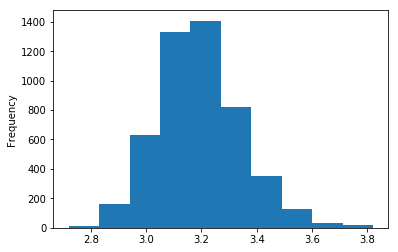

In [36]:
# This will return a matplotlib object
df['pH'].plot.hist();

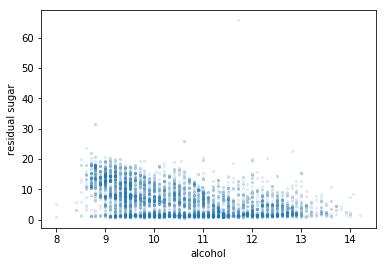

In [37]:
 # Scatter plot of two columns
df.plot.scatter('alcohol', 'residual sugar', s=5, alpha=0.1);

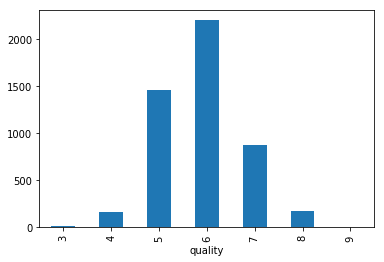

In [38]:
# Bar plot of the counted quality entries
df.groupby('quality')['quality'].count().plot.bar();

## Exercise: Data Exploration with Pandas


In [39]:
# Free exercise - try exploring the data set with pandas operations







---
_This notebook is licensed under a [Creative Commons Attribution 4.0 International License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/). Copyright © 2018 [Point 8 GmbH](https://point-8.de)_